In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
def make_X(mu, sigme, size):
    X = np.random.multivariate_normal(mu, sigme, size)
    return X

In [199]:
def identification_boundary(XX, mu, sigma, pi):
    sigma1 = sigma[0]
    sigma2 = sigma[1]
    mu1 = mu[0]
    mu2 = mu[1]
    pi1 = pi[0]
    pi2 = pi[1]
    
    S = np.linalg.inv(sigma1) - np.linalg.inv(sigma2)
    cT = mu2.T.dot(np.linalg.inv(sigma2)) - mu1.T.dot(np.linalg.inv(sigma1))
    F = mu1.T.dot(np.linalg.inv(sigma1)).dot(mu1) - mu2.T.dot(np.linalg.inv(sigma2)).dot(mu2) + (np.log(np.linalg.det(sigma1)/np.linalg.det(sigma2))) - (2*np.log(pi1/pi2))
    
    return XX.T.dot(S).dot(XX) + (2*cT.reshape(1,2).dot(XX)) + F

In [200]:
X1=0
X2=0

def make_data(mu, sigma, pi, size):
    global X1
    global X2
    
    sigma1 = sigma[0]
    sigma2 = sigma[1]
    mu1 = mu[0]
    mu2 = mu[1]
    pi1 = pi[0]
    pi2 = pi[1]

    X1 = make_X(mu1, sigma1, int(size*pi1))
    Y1 = np.full((1,len(X1)), 1)
    X2 = make_X(mu2, sigma2, int(size*pi2))
    Y2 = np.full((1,len(X1)), 0)
    
    X = np.vstack((X1,X2))
    Y = np.vstack((Y1,Y2))

    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])

    return X, Y.reshape(-1,1)

In [201]:
def make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1):
    global X1
    global X2
    
    etea = 1
    PI2 = 1 - PI1
    size = 100000
    
    X, Y = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)
    X = np.hstack((X,np.ones(len(X)).reshape(-1,1)))
    Y = (2*Y - np.ones(len(Y)).reshape(-1,1))

    W = 0
    W = np.random.randint(1000,10000,(3,1))

    j =0
    true_count = 0
    while(true_count != len(X)):
        true_count = 0

        if j == 20:
            break
            
        j+=1
        print(j,W[2])
        print(-W[2]/W[1])

        for i in range(len(X)):
            y = W.T.dot(X[i])

            if y*Y[i] >= 0:
                true_count += 1
            else:
                W = W.reshape(3,1) + (etea*X[i] * Y[i]).reshape(3,1)

            x1 = np.arange(X[:,0].min(), X[:,0].max(), 5)

            x2 = -(W[0]*x1 + W[2]) / W[1]
            
        plt.plot(x1,x2)
    
    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])
    plt.show()
    x1 = np.arange(X[:,0].min(), X[:,0].max(), 5)
    x2 = -(W[0]*x1 + W[2]) / W[1]
    
    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])
    plt.plot(x1,x2)
    #plt.ylim(X[:,:2].min(),X[:,:2].max())
    #plt.xlim(-5,5)


    plt.show()

1 [2250]
[-0.25513097]
2 [-1394.]
[11.83075773]
3 [-1395.]
[13.51976011]
4 [-1396.]
[15.76757149]


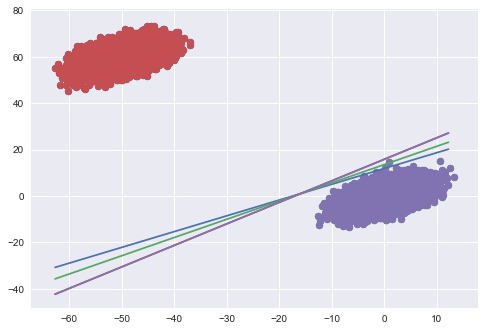

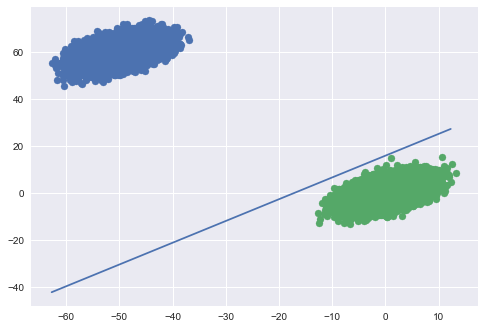

In [202]:
MU1 = np.array([-50, 60])
SIGMA1 = np.array([[10, 5], [5, 10]])
PI1 = 0.5
MU2 = np.array([0, 0])
SIGMA2 = np.array([[10, 5], [5, 10]])

make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1)